# Image Classification with TensorFlow
This notebook demonstrates training an image classification model using TensorFlow on CPU, saving/loading the model, and running inference.

In [1]:
# Install TensorFlow if not already installed
try:
    import tensorflow as tf
except ImportError:
    !pip install tensorflow
    import tensorflow as tf

In [2]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [17]:
import os
import shutil
import random

# Paths
dataset_dir = r"C:\Users\samri\cod\git\Farmer\Machine_Learning\Crop Disease Detection\PlantVillage"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test")

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop over each class folder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)

    # Skip train/test folders if script is re-run
    if class_name in ["train", "test"]:
        continue

    # Get all images for this class
    images = os.listdir(class_path)
    random.shuffle(images)

    # Compute split index
    split_idx = int(0.8 * len(images))
    train_images = images[:split_idx]
    test_images = images[split_idx:]

    # Create class folders inside train/test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Move train images
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, class_name, img)
        shutil.copy(src, dst)

    # Move test images
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, class_name, img)
        shutil.copy(src, dst)

print("✅ Dataset split completed: 80% train / 20% test")


✅ Dataset split completed: 80% train / 20% test


## Load Dataset
Images should be organized in subfolders under `datasets/images`, one folder per class.

In [18]:
import tensorflow as tf

train_dir = r"C:\Users\samri\cod\git\Farmer\Machine_Learning\Crop Disease Detection\PlantVillage\train"
test_dir = r"C:\Users\samri\cod\git\Farmer\Machine_Learning\Crop Disease Detection\PlantVillage\test"

img_height, img_width = 180, 180
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 16493 files belonging to 15 classes.
Found 4130 files belonging to 15 classes.
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


## Visualize Sample Images

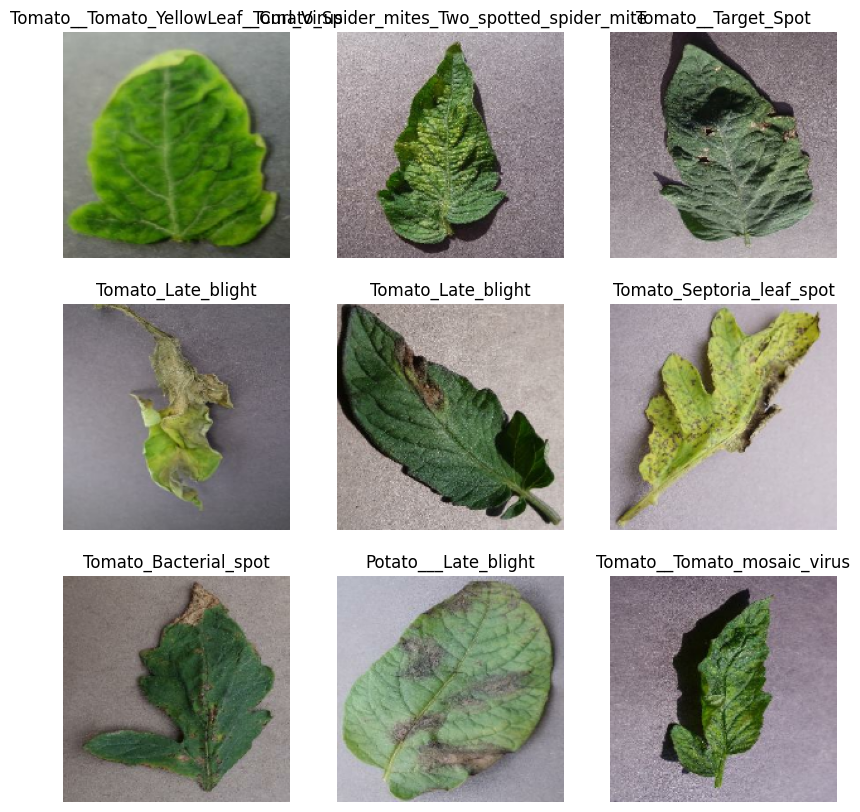

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Build the Model

In [20]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(512, 3, activation='relu'),
    # tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

c:\Users\samri\cod\git\Farmer\Machine_Learning\venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Train the Model (on CPU)

In [21]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Force TensorFlow to use CPU

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 524s 1s/step - accuracy: 0.6289 - loss: 1.1377 - val_accuracy: 0.8412 - val_loss: 0.4787
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 658s 1s/step - accuracy: 0.8576 - loss: 0.4161 - val_accuracy: 0.8712 - val_loss: 0.3919
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 627s 1s/step - accuracy: 0.9104 - loss: 0.2596 - val_accuracy: 0.9138 - val_loss: 0.2853
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1529s 3s/step - accuracy: 0.9459 - loss: 0.1604 - val_accuracy: 0.8971 - val_loss: 0.3405
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 635s 1s/step - accuracy: 0.9593 - loss: 0.1221 - val_accuracy: 0.8743 - val_loss: 0.4588
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 528s 1s/step - accuracy: 0.9675 - loss: 0.0966 - val_accuracy: 0.9291 - val_loss: 0.2949
Epoch 7/10
317/516 ━━━━━━━━━━━━━━━━━━━━ 3:03 920ms/step - accuracy: 0.9807 - loss: 0.0577

KeyboardInterrupt: 

## Save the Model

In [23]:
model.save('new_leaf_disease_model.h5')
print("Model Successfully saved")

Model Successfully saved


## Load the Model

In [24]:
loaded_model = tf.keras.models.load_model('new_leaf_disease_model.h5')

## Inference on a New Image

In [26]:
img_height, img_width = 180, 180

def predict_image(img_path):
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    predictions = loaded_model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)
    print(f"Predicted class: {predicted_class} ({confidence:.2f}% confidence)")
    return predicted_class, confidence

test_image_paths = [
    r"C:\Users\samri\cod\git\Farmer\Machine_Learning\Crop Disease Detection\PlantVillage\test\Potato___healthy\Potato_healthy_8.jpg",
    r"C:\Users\samri\cod\git\Farmer\Machine_Learning\Crop Disease Detection\PlantVillage\test\Tomato_Bacterial_spot\Tomato_Bacterial_spot_5.jpg",
    r"C:\Users\samri\cod\git\Farmer\Machine_Learning\Crop Disease Detection\PlantVillage\test\Pepper__bell___Bacterial_spot\Pepper_bell_Bacterial_spot_1.jpg"
]

for img_path in test_image_paths:
    predict_image(img_path)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted class: Potato___healthy (89.74% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: Tomato_Bacterial_spot (100.00% confidence)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: Pepper__bell___Bacterial_spot (99.95% confidence)
